In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import yfinance as yf
import datetime as dt

/Users/archit/Value-At-Risk/varenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=years*365)

In [3]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [4]:
adj_close_df = pd.DataFrame()
adj_close_df = yf.download(tickers, start=startDate, end=endDate)['Adj Close']
adj_close_df

[*********************100%***********************]  5 of 5 completed


Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2009-08-31 00:00:00+00:00,51.408333,93.400002,34.978081,77.488159,39.282009
2009-09-01 00:00:00+00:00,51.467773,93.900002,34.322727,75.778969,38.415829
2009-09-02 00:00:00+00:00,51.578766,96.190002,34.296520,75.491577,38.256268
2009-09-03 00:00:00+00:00,51.487347,97.459999,34.523712,76.119286,38.605785
2009-09-04 00:00:00+00:00,51.435108,97.529999,35.266441,77.185608,39.099655
...,...,...,...,...,...
2024-08-20 00:00:00+00:00,74.559998,232.460007,480.260010,558.700012,275.079987
2024-08-21 00:00:00+00:00,74.720001,232.149994,482.500000,560.619995,276.459991
2024-08-22 00:00:00+00:00,74.419998,229.369995,474.850006,556.219971,274.119995


In [5]:
# daily log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns.dropna(inplace=True)
log_returns

Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2009-09-01 00:00:00+00:00,0.001156,0.005339,-0.018914,-0.022304,-0.022297
2009-09-02 00:00:00+00:00,0.002154,0.024095,-0.000764,-0.003800,-0.004162
2009-09-03 00:00:00+00:00,-0.001774,0.013117,0.006602,0.008281,0.009095
2009-09-04 00:00:00+00:00,-0.001015,0.000718,0.021285,0.013911,0.012712
2009-09-08 00:00:00+00:00,-0.000508,-0.001026,0.009371,0.008586,0.010054
...,...,...,...,...,...
2024-08-20 00:00:00+00:00,0.002955,0.003663,-0.002101,-0.001627,-0.002433
2024-08-21 00:00:00+00:00,0.002144,-0.001335,0.004653,0.003431,0.005004
2024-08-22 00:00:00+00:00,-0.004023,-0.012047,-0.015982,-0.007879,-0.008500


In [29]:
# Portfolio expected returns

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [30]:
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [32]:
cov_matrix = log_returns.cov()
cov_matrix

Ticker,BND,GLD,QQQ,SPY,VTI
Ticker,,,,,
BND,9.224066e-06,0.000009,8.633757e-07,-1.321789e-08,1.718729e-07
GLD,8.872665e-06,0.000097,7.590262e-06,6.569766e-06,7.175762e-06
QQQ,8.633757e-07,0.000008,1.659966e-04,1.293454e-04,1.321289e-04
SPY,-1.321789e-08,0.000007,1.293454e-04,1.169538e-04,1.194089e-04
VTI,1.718729e-07,0.000007,1.321289e-04,1.194089e-04,1.228991e-04


In [33]:
# equally weighted portfolio
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
# expected return
portfolio_expected_return = expected_return(weights, log_returns)
# standard deviation
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [34]:
# random z-score based on normal distribution
def random_z_score():
    return np.random.normal(0, 1)

In [35]:
# scenarios gains and losses
days = 5
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [36]:
# run simulation
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [40]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

25044.309430292426


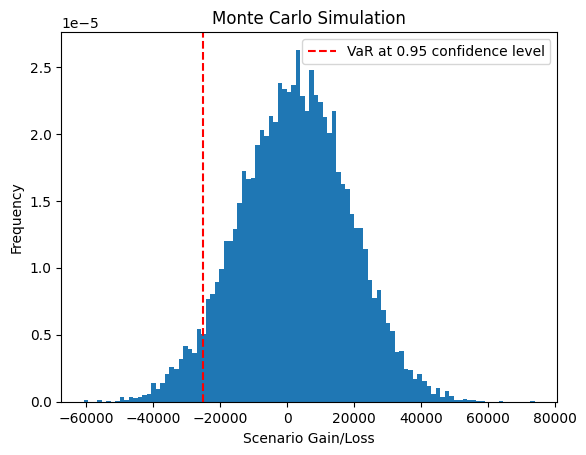

In [42]:
plt.hist(scenarioReturn, bins=100, density=True)
plt.xlabel('Scenario Gain/Loss')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation')
plt.axvline(-VaR, color='r', linestyle='dashed', label=f'VaR at {confidence_interval} confidence level')
plt.legend()
plt.show()